## Data cleaning

- import
- identify categorical data
    - convert categorical to int
- identify missing data
    - analyse and replace
- identify outliers 
    - analyse and replace/remove

In [2]:
import sklearn
import numpy as np
import scipy as sp
import pandas as pd
%matplotlib notebook
%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:

qsar = pd.read_excel('QSAR_dataset.xlsx')
print(qsar.shape)

(154, 76)


In [4]:
qsar.describe()
data =qsar
data.describe()

,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,a_nC,a_nCl,...,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
count,154.000000,152.000000,153.000000,154.000000,154.000000,153.000000,154.000000,153.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,1.470000e+02,141.000000,136.000000,154.000000,154.000000
mean,34.610698,105.781739,359.928668,23.909091,0.292208,18.875817,17.350649,33.912102,11.649351,3.110390,...,273.307303,8.076532,239.944812,9.086768,2.379611,-6.802721e+08,-66.497364,-2.501405,359.813016,101.350649
std,5.951534,62.391286,111.225998,4.895461,0.862625,5.596428,5.028718,9.714722,2.472152,2.954031,...,52.783753,14.721655,59.915749,15.129738,2.637952,8.247861e+09,73.647379,2.807324,132.955027,33.487395
min,17.148172,8.778115,122.917570,12.000000,0.000000,10.000000,6.000000,12.000000,6.000000,0.000000,...,140.102050,0.000000,67.651054,0.000000,0.011998,-1.000000e+11,-209.769584,-8.247237,128.174000,46.000000
25%,31.534723,70.909811,330.864750,22.000000,0.000000,17.000000,16.000000,30.541887,12.000000,0.000000,...,246.182178,0.000000,203.302167,0.000000,0.124434,2.696068e-01,-132.566487,-5.058933,291.992000,88.000000
50%,35.579689,98.659012,389.503510,22.000000,0.000000,18.000000,17.000000,31.868664,12.000000,4.000000,...,281.160615,0.000000,253.968020,0.000000,0.376156,8.136986e-01,-10.648449,-0.411358,360.881990,94.000000
75%,38.401845,139.629990,427.294460,25.750000,0.000000,19.000000,18.000000,37.087944,12.000000,6.000000,...,295.503230,13.566921,272.261230,13.566921,4.786711,9.972196e+00,-3.509363,-0.133136,410.317990,106.000000
max,52.422001,356.764860,622.904600,43.000000,4.000000,43.000000,40.000000,86.319427,20.000000,10.000000,...,432.120120,59.150364,475.687620,59.150364,7.429943,1.611555e+01,-0.338738,-0.013318,959.170960,246.000000


### Identifying missing values

In [20]:
data = qsar
# Affichage des nombres, taux et types des valeurs manquantes par attribut
nb_m = data.isnull().sum().sort_values()[50:]
ratio_m = (data1.isnull().sum()/data1.shape[0]).sort_values()[50:]
manquant = pd.concat([nb_m, ratio_m], axis=1, sort=False)



In [21]:
# Afficher la liste des attributs avec le nombres de données manquantes
pd.DataFrame({'Types': data[list(manquant.index.values)].dtypes,
                       'Nb manquants': nb_m,
                      'Ratio manquants%': ratio_m,})

,Types,Nb manquants,Ratio manquants%
chi0,float64,0,0.000000
chi0v,float64,0,0.000000
CASA+,float64,0,0.000000
chi0_C,float64,0,0.000000
logP(o/w),float64,0,0.000000
h_logS,float64,0,0.000000
h_logP,float64,0,0.000000
chi0v_C,float64,0,0.000000
diameter,int64,0,0.000000
density,float64,0,0.000000


*Data with missing values*
- vsurf_V (18 values)
- vsurf_S (13 values)
- vsurf_R (7 values)
- ASA+  (2 values)
- a_heavy (1 value)
- ASA- (1 value)
- a_IC (1 value)

In [7]:
#Managing categorical data

pd.Categorical(data['Class'].values)

['Class 2', 'Class 2', 'Class -2', 'Class -2', 'Class -2', ..., 'Class -1', 'Class 0', 'Class 0', 'Class 0', 'Class 0']
Length: 154
Categories (5, object): ['Class -1', 'Class -2', 'Class 0', 'Class 1', 'Class 2']

In [8]:
# Placing the 'Class' column at the end of df / replacing with numeric value

data['Class'] = data.pop('Class')

data['Class'] = data['Class'].replace({'Class 1' : 1, 'Class 2':2, 'Class 0':0, 'Class -1':-1, 'Class -2':-2})

data.iloc[:,-1]



0      2
1      2
2     -2
3     -2
4     -2
      ..
149   -1
150    0
151    0
152    0
153    0
Name: Class, Length: 154, dtype: int64


### Replacing missing values

*will be done after cleaning the outliers*

### Identifying outliers

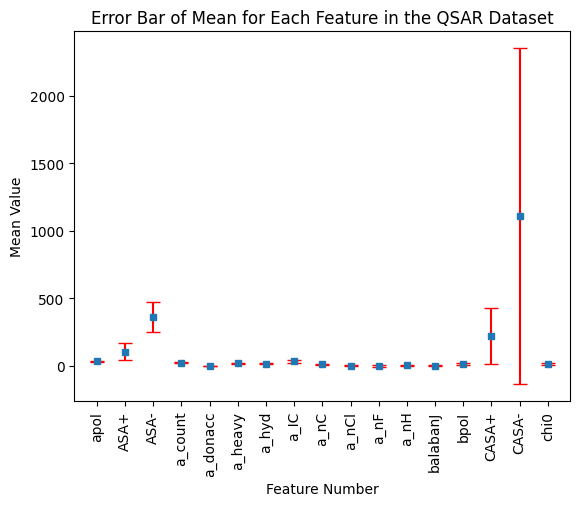

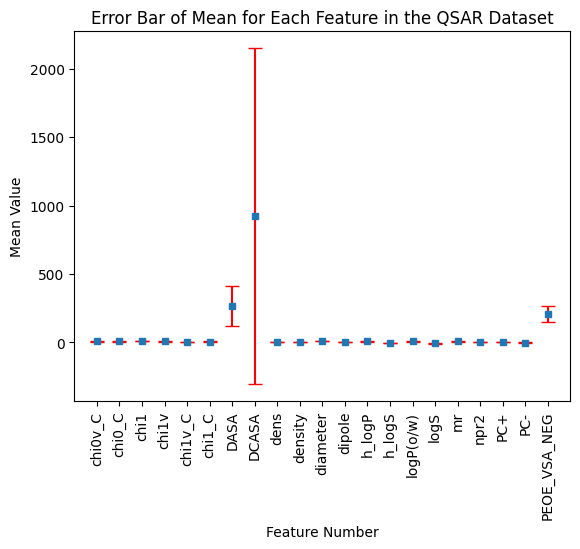

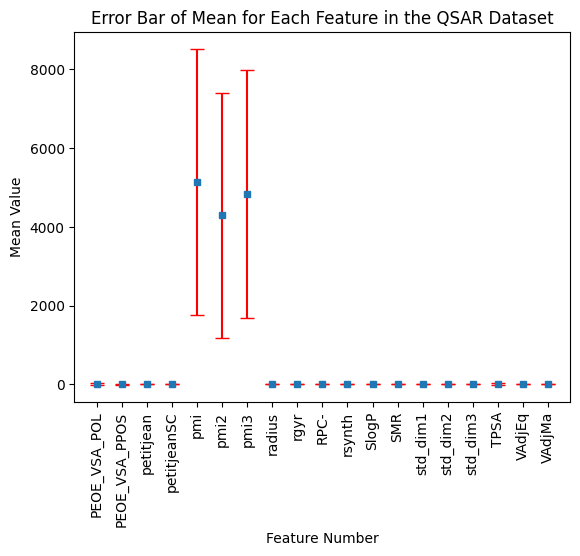

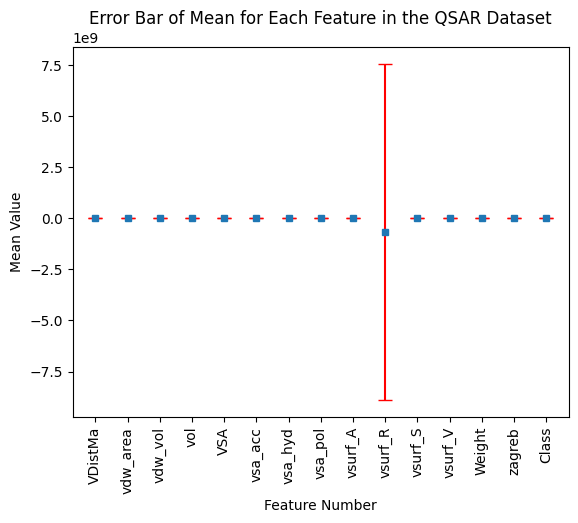

In [9]:
import numpy as np
import pandas as pd

%matplotlib inline

def plot_graph(val1, val2):
    data1 = data.iloc[:,val1:val2]
    
    means = np.mean(data1, axis=0)
    std_devs = np.std(data1, axis=0)
    
    features = data1.columns[0: val2-1]
  
    plt.errorbar(features, means, yerr=std_devs, capsize=5, ecolor='red', linestyle='None', marker='s', markersize=5)
    plt.xlabel('Feature Number')
    plt.ylabel('Mean Value')
    plt.xticks(features, rotation=90)
    plt.title('Error Bar of Mean for Each Feature in the QSAR Dataset')
    
    plt.show()

plot_graph(1,18)
plot_graph(19,40)
plot_graph(41,60)
plot_graph(61,76)



**Features with smaller error margins were not considered outliers**
- CASA-
- DCASA
- pmi
- pmi2
- pmi3
- vsurf_R



<Axes: xlabel='pmi3'>

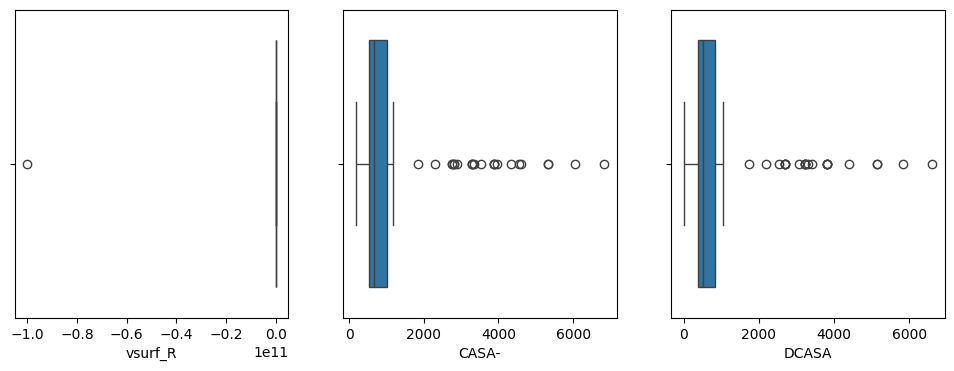

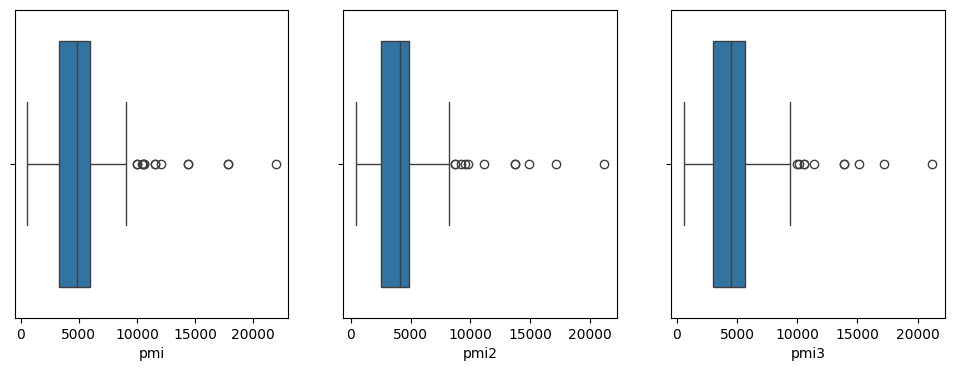

In [11]:
fig,axes=plt.subplots(1,3,figsize=(12,4))
#sns.scatterplot(x="CASA-", y="DCASA",data = data, ax = axes[0])
sns.boxplot(x="vsurf_R", data = data, ax = axes[0])
sns.boxplot(x="CASA-", data = data, ax = axes[1])
sns.boxplot(x="DCASA", data = data, ax = axes[2])

fig,axes=plt.subplots(1,3,figsize=(12,4))
sns.boxplot(x="pmi", data = data, ax = axes[0])
sns.boxplot(x="pmi2", data = data, ax = axes[1])
sns.boxplot(x="pmi3", data = data, ax = axes[2])

#fig,axes=plt.subplots(1,3,figsize=(12,4))
#sns.boxplot(x="vsurf_R", data = data, ax = axes[0])
#sns.boxplot(x="vsurf_S", data = data, ax = axes[1])
#sns.boxplot(x="vsurf_V", data = data, ax = axes[2])



In [12]:
# Donnees abherrantes / outliers
data_aber = data[['CASA-', 'DCASA', 'pmi', 'pmi2', 'pmi3', 'vsurf_R']]
data_aber

,CASA-,DCASA,pmi,pmi2,pmi3,vsurf_R
0,6834.02000,6621.615700,21944.05900,21172.36300,21229.14300,7.831075
1,188.03406,0.863535,568.41663,408.21695,568.41663,0.087020
2,884.15338,815.165530,7079.02200,5006.45560,6796.06200,0.104483
3,1003.01210,892.889340,4013.81350,2971.49510,3176.08280,10.787536
4,837.49609,739.203370,6711.78080,5598.17870,5870.30220,0.298724
...,...,...,...,...,...,...
149,604.62732,427.079990,4534.01030,3851.21340,4286.33350,0.410473
150,1073.36360,960.303340,5088.14650,4233.84910,4504.98730,15.020321
151,268.20758,5.903447,1224.48460,914.26013,1224.48360,0.212847
152,529.85095,363.239070,4474.36520,3864.40970,4474.36520,0.457762


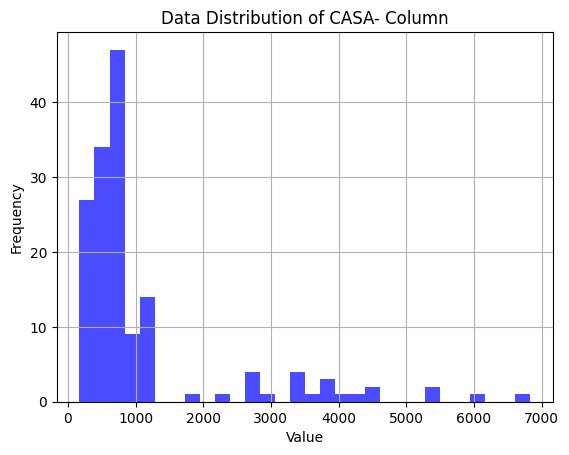

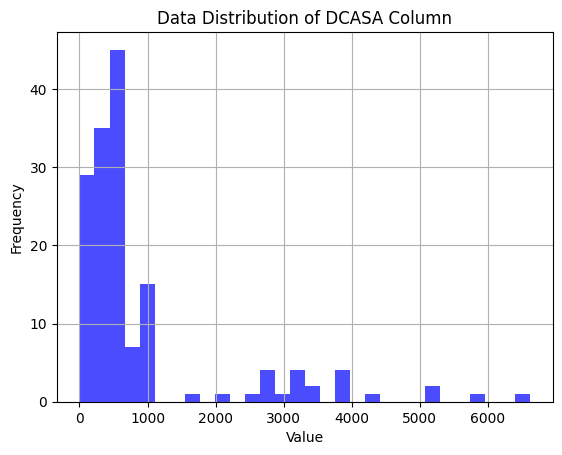

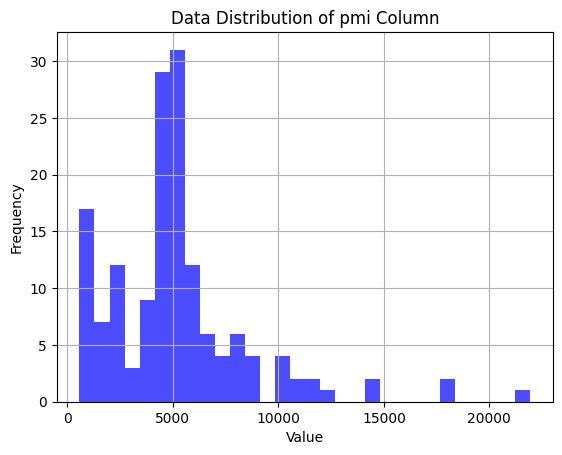

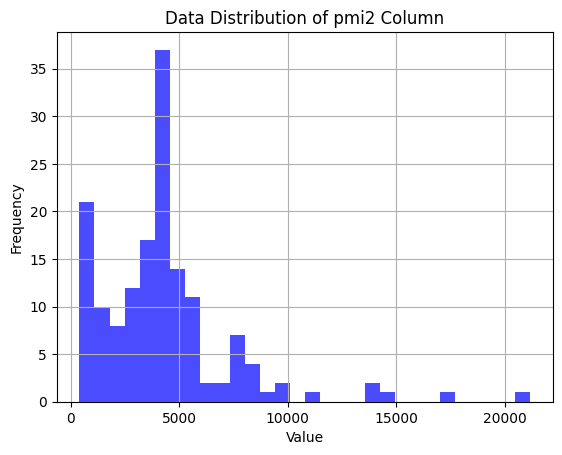

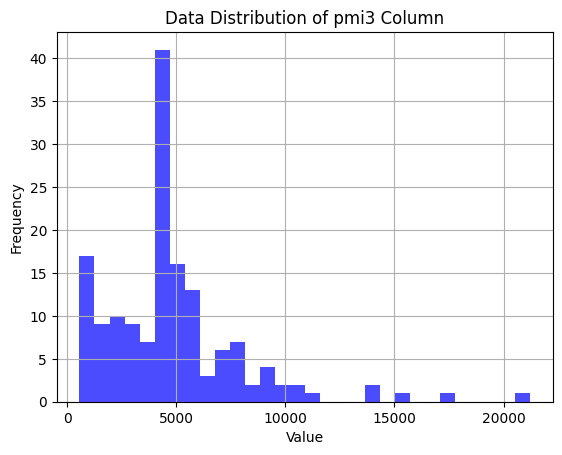

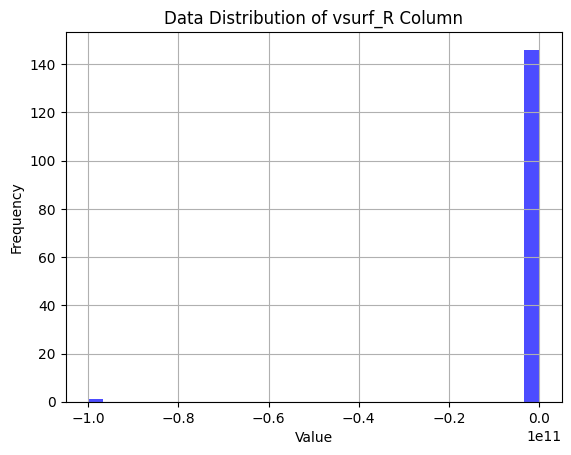

In [13]:
def plot_histo(val1):
    #fig,axes=plt.subplots(1,2,figsize=(8,4))
    #sns.boxplot(x=val1, data = data_wout_duplicates)
    plt.hist(data_aber[val1], bins=30, alpha=0.7, color='blue')
    plt.title('Data Distribution of '+val1+' Column')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

plot_histo('CASA-')
plot_histo('DCASA')
plot_histo('pmi')
plot_histo('pmi2')
plot_histo('pmi3')
plot_histo('vsurf_R')

In [14]:
tmp = data_aber.copy()
tmp['vsurf_R'][tmp['vsurf_R']<-0.8] = np.nan


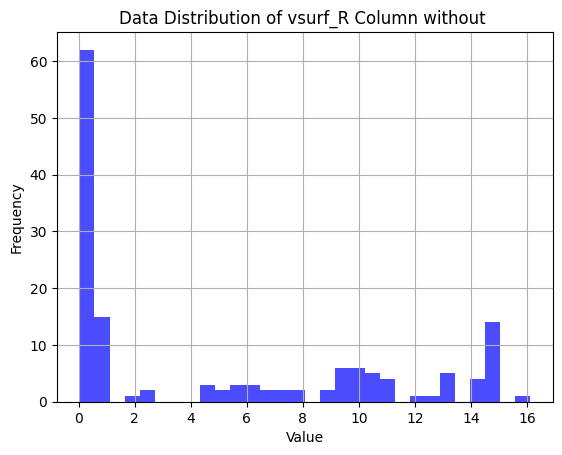

In [15]:
plt.hist(tmp['vsurf_R'], bins=30, alpha=0.7, color='blue')
plt.title('Data Distribution of vsurf_R Column without ')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [49]:
tmp.describe()

,CASA-,DCASA,pmi,pmi2,pmi3,vsurf_R
count,132.000000,132.000000,132.000000,132.000000,132.000000,124.000000
mean,1057.549391,867.477953,5122.021356,4242.160222,4814.067973,4.699450
std,1222.202633,1196.352216,3521.654483,3217.116941,3278.327275,5.366277
min,170.115160,0.045450,568.416630,408.216950,568.416630,0.026024
25%,528.049895,358.852200,2487.175500,2017.251600,2412.638400,0.267943
50%,659.802980,497.279805,4778.171400,3997.628200,4478.229700,0.803816
75%,877.218993,682.369495,6106.522500,4901.644150,5783.464500,9.767328
max,6834.020000,6621.615700,21944.059000,21172.363000,21229.143000,16.115547


<Axes: xlabel='vsurf_R'>

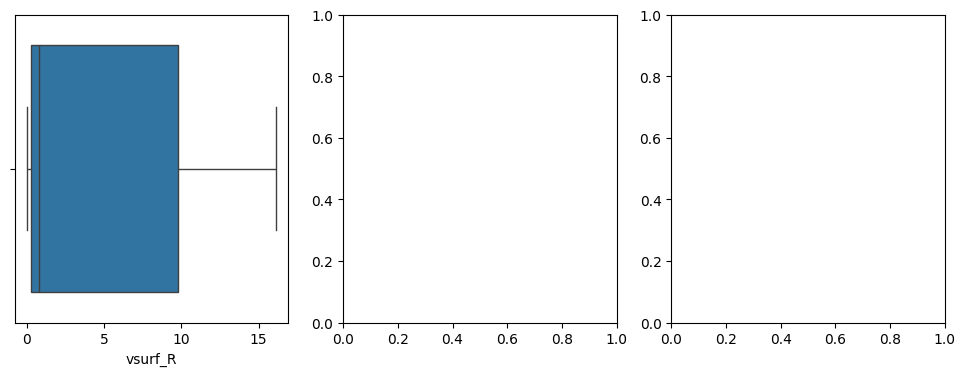

In [50]:
fig,axes=plt.subplots(1,3,figsize=(12,4))
sns.boxplot(x="vsurf_R", data = tmp, ax = axes[0])

In [16]:
data1 = data
data1['vsurf_R'][data1['vsurf_R']<-0.8] = np.nan

C:\Users\adm\AppData\Local\Temp\ipykernel_23728\42685170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['vsurf_R'][data1['vsurf_R']<-0.8] = np.nan


<Axes: xlabel='pmi'>

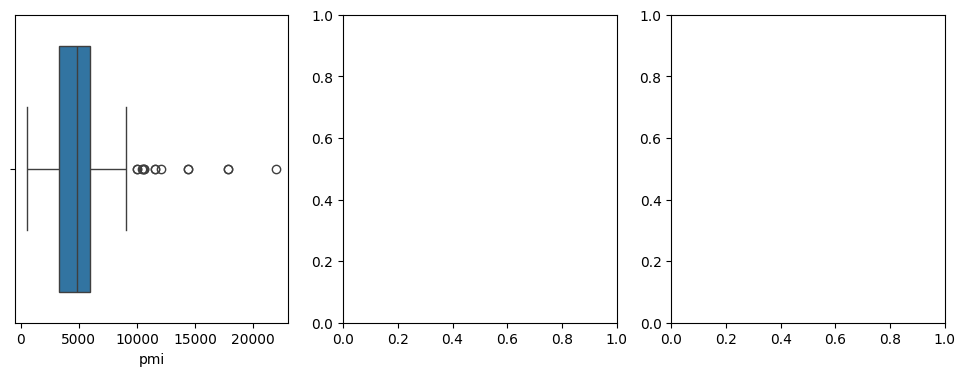

In [22]:
fig,axes=plt.subplots(1,3,figsize=(12,4))
sns.boxplot(x="pmi", data = data1, ax = axes[0])

In [30]:
Q1 = data1['pmi'].quantile(0.25)
Q3 = data1['pmi'].quantile(0.75)
IQR = Q3 - Q1
upper_boundery = Q3 + 1.5*IQR

condition = data1['pmi']>upper_boundery
condition.sum() # 14 values are outside the upper_boundary


0

In [29]:
data1['pmi'][data1['pmi']>Q3] = upper_boundery


#data.fillna(0)

C:\Users\adm\AppData\Local\Temp\ipykernel_23728\1298496308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['pmi'][data1['pmi']>Q3] = upper_boundery


<Axes: xlabel='pmi'>

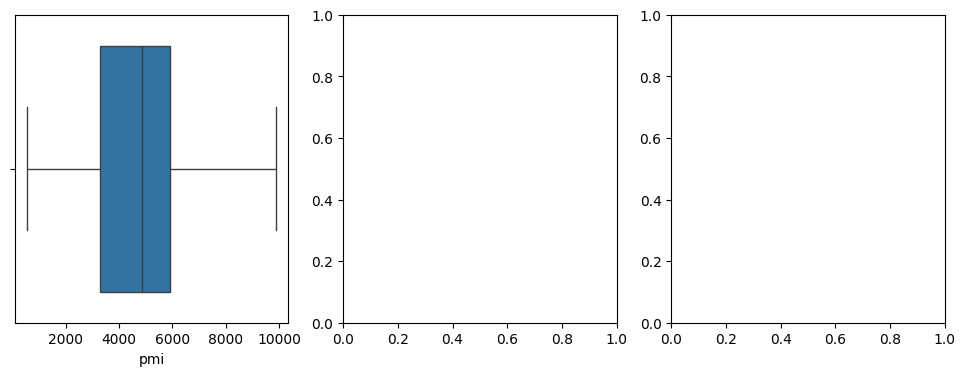

In [31]:
fig,axes=plt.subplots(1,3,figsize=(12,4))
sns.boxplot(x="pmi", data = data1, ax = axes[0])

<Axes: xlabel='pmi2'>

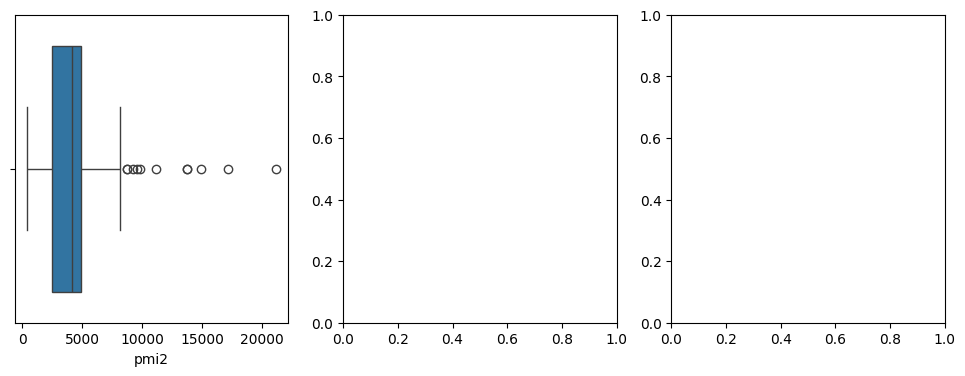

In [32]:
fig,axes=plt.subplots(1,3,figsize=(12,4))
sns.boxplot(x="pmi2", data = data1, ax = axes[0])

In [33]:
Q1 = data1['pmi2'].quantile(0.25)
Q3 = data1['pmi2'].quantile(0.75)
IQR = Q3 - Q1
upper_boundery = Q3 + 1.5*IQR

condition = data1['pmi2']>upper_boundery
condition.sum() # 11 values are outside the upper_boundary

11

In [34]:
data1['pmi2'][data1['pmi2']>Q3] = upper_boundery

C:\Users\adm\AppData\Local\Temp\ipykernel_23728\4242778588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['pmi2'][data1['pmi2']>Q3] = upper_boundery


<Axes: xlabel='pmi2'>

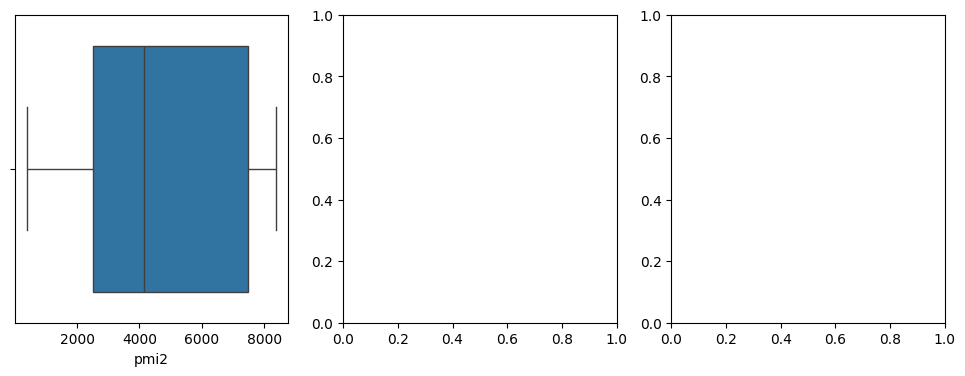

In [35]:
fig,axes=plt.subplots(1,3,figsize=(12,4))
sns.boxplot(x="pmi2", data = data1, ax = axes[0])

<Axes: xlabel='pmi3'>

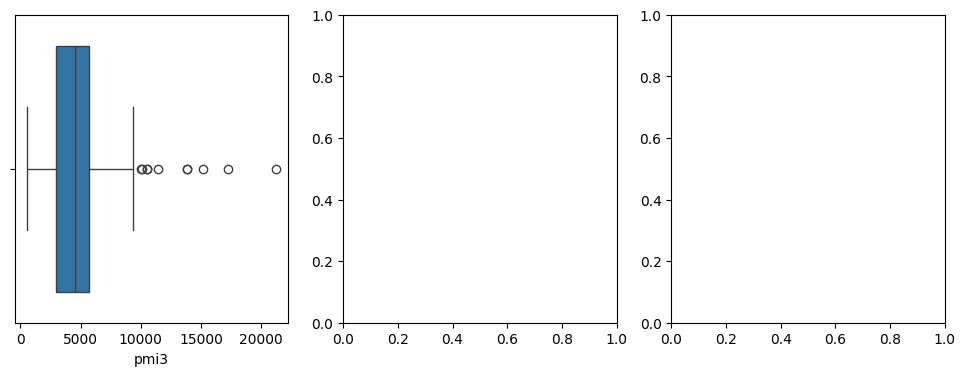

In [36]:
fig,axes=plt.subplots(1,3,figsize=(12,4))
sns.boxplot(x="pmi3", data = data1, ax = axes[0])

In [38]:
Q1 = data1['pmi3'].quantile(0.25)
Q3 = data1['pmi3'].quantile(0.75)
IQR = Q3 - Q1
upper_boundery = Q3 + 1.5*IQR

condition = data1['pmi3']>upper_boundery
condition.sum() # 10 values are outside the upper_boundary

10

In [39]:
data1.loc[data1['pmi3']>Q3, 'pmi3'] = upper_boundery

<Axes: xlabel='pmi3'>

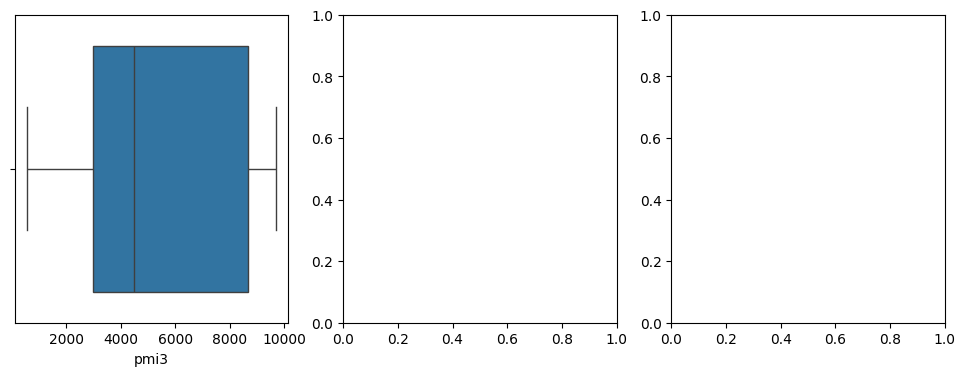

In [40]:
fig,axes=plt.subplots(1,3,figsize=(12,4))
sns.boxplot(x="pmi3", data = data1, ax = axes[0])

<Axes: xlabel='CASA-'>

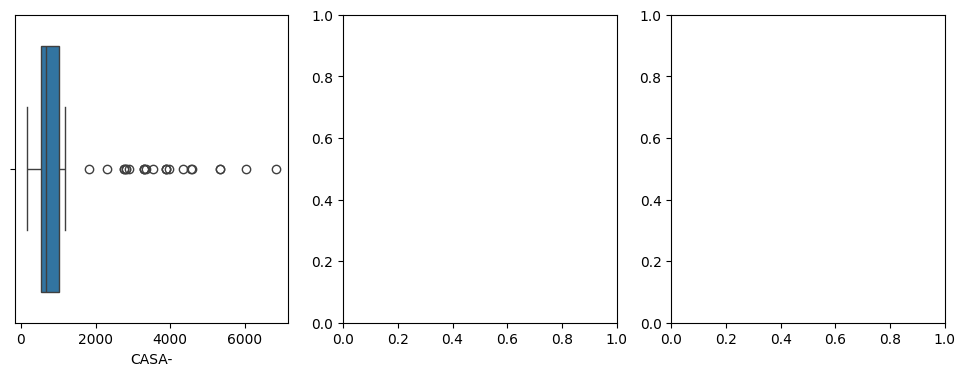

In [41]:
fig,axes=plt.subplots(1,3,figsize=(12,4))
sns.boxplot(x="CASA-", data = data1, ax = axes[0])

In [42]:
Q1 = data1['CASA-'].quantile(0.25)
Q3 = data1['CASA-'].quantile(0.75)
IQR = Q3 - Q1
upper_boundery = Q3 + 1.5*IQR

condition = data1['CASA-']>upper_boundery
condition.sum() # 10 values are outside the upper_boundary

23

In [43]:
data1.loc[data1['CASA-']>Q3, 'CASA-'] = upper_boundery

<Axes: xlabel='CASA-'>

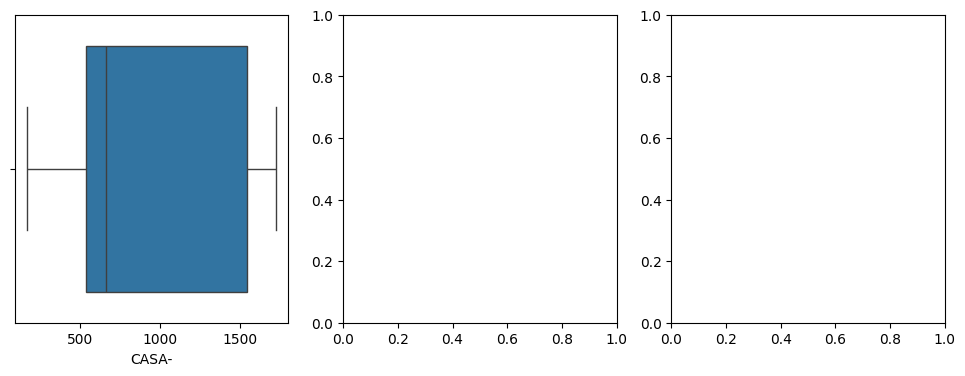

In [44]:
fig,axes=plt.subplots(1,3,figsize=(12,4))
sns.boxplot(x="CASA-", data = data1, ax = axes[0])

<Axes: xlabel='DCASA'>

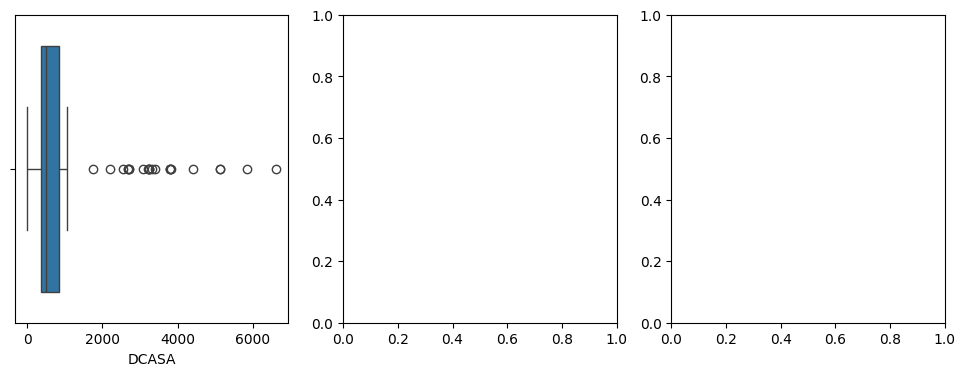

In [45]:
fig,axes=plt.subplots(1,3,figsize=(12,4))
sns.boxplot(x="DCASA", data = data1, ax = axes[0])

In [46]:
Q1 = data1['DCASA'].quantile(0.25)
Q3 = data1['DCASA'].quantile(0.75)
IQR = Q3 - Q1
upper_boundery = Q3 + 1.5*IQR

condition = data1['DCASA']>upper_boundery
condition.sum() # 10 values are outside the upper_boundary

23

In [48]:
data1.loc[data1['DCASA']>Q3, 'DCASA'] = upper_boundery

<Axes: xlabel='DCASA'>

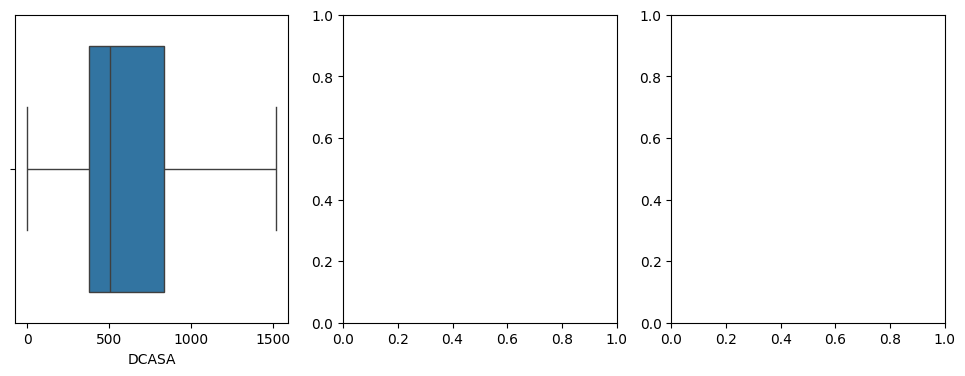

In [49]:
fig,axes=plt.subplots(1,3,figsize=(12,4))
sns.boxplot(x="DCASA", data = data1, ax = axes[0])

### All outliers addressed data1

### Adressing missing data in data1

In [75]:
nb_m = data1.isnull().sum().sort_values()[50:]
ratio_m = (data1.isnull().sum()/data1.shape[0]).sort_values()[50:]
manquant = pd.concat([nb_m, ratio_m], axis=1, sort=False)

pd.DataFrame({'Types': data1[list(manquant.index.values)].dtypes,
                       'Nb manquants': nb_m,
                      'Ratio manquants%': ratio_m,})

,Types,Nb manquants,Ratio manquants%
a_count,int64,0,0.0
ASA-,float64,0,0.0
ASA+,float64,0,0.0
apol,float64,0,0.0
CASA-,float64,0,0.0
chi0,float64,0,0.0
chi0v,float64,0,0.0
chi0v_C,float64,0,0.0
mr,float64,0,0.0
logS,float64,0,0.0


In [55]:
Q1 = qsar['vsurf_R'].quantile(0.25)
Q3 = qsar['vsurf_R'].quantile(0.75)
IQR = Q3 - Q1
upper_boundery = Q3 + 1.5*IQR
lower_boundery = Q1 - 1.5*IQR

condition = qsar['vsurf_R']<lower_boundery
condition.sum() # 10 values are outside the upper_boundary

1

In [63]:
tmp = data1
    
avg = tmp['a_IC'].mean()
tmp.loc[tmp['a_IC'].isnull(), 'a_IC'] = avg

In [65]:
avg = tmp['a_heavy'].mean()
tmp.loc[tmp['a_heavy'].isnull(), 'a_heavy'] = avg


In [73]:

avg = tmp['ASA+'].mean()
tmp.loc[tmp['ASA+'].isnull(), 'ASA+'] = avg

In [74]:
avg = tmp['ASA-'].mean()
tmp.loc[tmp['ASA-'].isnull(), 'ASA-'] = avg

In [69]:
avg = tmp['vsurf_V'].mean()
tmp.loc[tmp['vsurf_V'].isnull(), 'vsurf_V'] = avg

In [70]:
avg = tmp['vsurf_S'].mean()
tmp.loc[tmp['vsurf_S'].isnull(), 'vsurf_S'] = avg

In [71]:
avg = tmp['vsurf_R'].mean()
tmp.loc[tmp['vsurf_R'].isnull(), 'vsurf_R'] = avg

In [76]:
data1 = tmp

data1.describe()

,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,a_nC,a_nCl,...,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb,Class
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,34.610698,105.781739,359.928668,23.909091,0.292208,18.875817,17.350649,33.912102,11.649351,3.110390,...,8.076532,239.944812,9.086768,2.379611,5.066157,-66.497364,-2.501405,359.813016,101.350649,-0.337662
std,5.951534,61.982158,110.861919,4.895461,0.862625,5.578109,5.028718,9.682923,2.472152,2.954031,...,14.721655,59.915749,15.129738,2.637952,5.495740,70.449124,2.637022,132.955027,33.487395,0.802128
min,17.148172,8.778115,122.917570,12.000000,0.000000,10.000000,6.000000,12.000000,6.000000,0.000000,...,0.000000,67.651054,0.000000,0.011998,0.026024,-209.769584,-8.247237,128.174000,46.000000,-2.000000
25%,31.534723,72.382959,330.864750,22.000000,0.000000,17.000000,16.000000,30.541887,12.000000,0.000000,...,0.000000,203.302167,0.000000,0.124434,0.272214,-128.168849,-4.778051,291.992000,88.000000,-1.000000
50%,35.579689,99.001797,385.034350,22.000000,0.000000,18.000000,17.000000,31.868664,12.000000,4.000000,...,0.000000,253.968020,0.000000,0.376156,1.522968,-45.695715,-2.370900,360.881990,94.000000,0.000000
75%,38.401845,138.242973,427.294460,25.750000,0.000000,19.000000,18.000000,37.043074,12.000000,6.000000,...,13.566921,272.261230,13.566921,4.786711,9.846571,-3.632296,-0.139307,410.317990,106.000000,0.000000
max,52.422001,356.764860,622.904600,43.000000,4.000000,43.000000,40.000000,86.319427,20.000000,10.000000,...,59.150364,475.687620,59.150364,7.429943,16.115547,-0.338738,-0.013318,959.170960,246.000000,2.000000


In [87]:
df_Smiles = data1.pop('SMILES')

### Calcule de l'Entropie afin de determiner les 10 *meilleurs* attributs 

In [77]:
def count_classes(vector):
    class_counts = {}
    
    for label in vector:
        if label in class_counts:
            class_counts[label] += 1
        else:
            class_counts[label] = 1

    num_classes = len(class_counts)

    return class_counts, num_classes

In [78]:
import math 
def calculate_entropy(vector):
    class_counts, num_classes = count_classes(vector)

    # Calculate the probabilities of each class
    class_probabilities = [count / len(vector) for count in class_counts.values()]

    # Calculate entropy using the formula
    entropy = -sum(p * math.log2(p) for p in class_probabilities)

    return entropy

In [79]:
def calculate_entropy_for_features(df):

    feature_entropies = {}

    for column in df.columns[:-1]:  # Exclude the last column assuming it's the target variable
        feature_vector = df[column]
        entropy_value = calculate_entropy(feature_vector)
        feature_entropies[column] = entropy_value

    return feature_entropies

In [80]:
def find_max_entropy_feature(df):

    max_entropy_feature = None
    max_entropy_value = float('-inf')  # Initialize with negative infinity

    for column in df.columns:
        feature_vector = df[column]
        entropy_value = calculate_entropy(feature_vector)

        if entropy_value > max_entropy_value:
            max_entropy_value = entropy_value
            max_entropy_feature = column

    # Remove the column with the maximum entropy feature
    df_after_removal = df.drop(columns=[max_entropy_feature])

    return max_entropy_feature, max_entropy_value, df_after_removal

In [88]:
max_entropy_feature, max_entropy_value, df_after_removal = find_max_entropy_feature(data1)
print("Max Entropy Feature:", max_entropy_feature)
print("Max Entropy Feature:", max_entropy_value)
print("DataFrame After Removal:\n", df_after_removal)

Max Entropy Feature: ASA+
Max Entropy Feature: 6.443870592946854
DataFrame After Removal:
           apol       ASA-  a_count  a_donacc  a_heavy  a_hyd       a_IC  a_nC  \
0    41.283001  622.40619       43         0     43.0     40  49.644451    14   
1    22.934343  156.69504       18         0     10.0     10  17.839369    10   
2    42.919998  499.52170       22         0     22.0     22  21.868664    12   
3    38.509171  421.43369       23         1     19.0     16  38.822643    10   
4    41.406792  480.49115       22         0     21.0     21  26.558620    12   
..         ...        ...      ...       ...      ...    ...        ...   ...   
149  35.353966  369.80264       22         0     17.0     17  31.868664    12   
150  37.002380  427.29446       22         0     19.0     17  34.823284    12   
151  31.307930  178.80505       24         0     14.0     14  23.516850    14   
152  33.309174  333.65930       21         0     17.0     14  33.219116    12   
153  34.827930  17

In [82]:
def build_decision_tree(df):

    decision_tree_order = []

    while df.shape[1] > 1:  # Continue until only one attribute (column) is left
        max_entropy_feature, _, df = find_max_entropy_feature(df)
        decision_tree_order.append(max_entropy_feature)

    # Add the last remaining attribute without calculating its entropy
    decision_tree_order.append(df.columns[0])

    return decision_tree_order

In [89]:
decision_tree_order = build_decision_tree(data1)
print("Decision Tree Order:", decision_tree_order)

Decision Tree Order: ['ASA+', 'ASA-', 'CASA+', 'DASA', 'h_logP', 'h_logS', 'npr2', 'rgyr', 'std_dim1', 'std_dim2', 'std_dim3', 'VSA', 'vsurf_A', 'dipole', 'dens', 'vsurf_R', 'vol', 'vsurf_S', 'vsurf_V', 'balabanJ', 'VDistEq', 'VDistMa', 'vdw_vol', 'chi1v', 'logP(o/w)', 'mr', 'PEOE_VSA_NEG', 'SlogP', 'SMR', 'chi0v', 'logS', 'vdw_area', 'apol', 'Weight', 'density', 'PC-', 'PC+', 'chi1', 'RPC-', 'vsa_hyd', 'DCASA', 'CASA-', 'a_IC', 'chi1_C', 'bpol', 'chi1v_C', 'chi0', 'pmi', 'pmi2', 'pmi3', 'zagreb', 'chi0_C', 'VAdjEq', 'chi0v_C', 'VAdjMa', 'a_heavy', 'a_hyd', 'a_nH', 'a_count', 'PEOE_VSA_POL', 'rsynth', 'TPSA', 'PEOE_VSA_PNEG', 'diameter', 'a_nCl', 'petitjean', 'petitjeanSC', 'a_nC', 'vsa_pol', 'Class', 'PEOE_VSA_PPOS', 'vsa_acc', 'radius', 'a_nF', 'a_donacc']


In [91]:
df = pd.DataFrame(decision_tree_order, columns=['Feature'])

print(df.head(10))
best_attr = df.head(10)

    Feature
0      ASA+
1      ASA-
2     CASA+
3      DASA
4    h_logP
5    h_logS
6      npr2
7      rgyr
8  std_dim1
9  std_dim2


In [106]:
best_attr_data = {}

best_attr_data = data1[best_attr['Feature'].tolist()].copy()
best_attr_data['Class'] = data1['Class']

In [112]:
best_attr_data.corr()

,ASA+,ASA-,CASA+,DASA,h_logP,h_logS,npr2,rgyr,std_dim1,std_dim2,Class
ASA+,1.000000,-0.798836,0.690991,-0.817974,-0.598053,0.433741,-0.469138,-0.519050,-0.252458,0.721753,0.213162
ASA-,-0.798836,1.000000,-0.388159,0.952860,0.861851,-0.735130,0.618873,0.870883,0.526919,-0.619048,-0.309695
CASA+,0.690991,-0.388159,1.000000,-0.360121,-0.442658,0.373197,-0.127693,-0.143074,0.186382,0.419890,0.248990
DASA,-0.817974,0.952860,-0.360121,1.000000,0.739389,-0.580485,0.613636,0.785092,0.488847,-0.669068,-0.272222
h_logP,-0.598053,0.861851,-0.442658,0.739389,1.000000,-0.945871,0.467831,0.806034,0.410089,-0.352524,-0.467565
h_logS,0.433741,-0.735130,0.373197,-0.580485,-0.945871,1.000000,-0.374398,-0.712116,-0.369834,0.149582,0.456648
npr2,-0.469138,0.618873,-0.127693,0.613636,0.467831,-0.374398,1.000000,0.607539,0.601557,-0.757773,-0.137202
rgyr,-0.519050,0.870883,-0.143074,0.785092,0.806034,-0.712116,0.607539,1.000000,0.731985,-0.443744,-0.290141
std_dim1,-0.252458,0.526919,0.186382,0.488847,0.410089,-0.369834,0.601557,0.731985,1.000000,-0.393992,0.075181
std_dim2,0.721753,-0.619048,0.419890,-0.669068,-0.352524,0.149582,-0.757773,-0.443744,-0.393992,1.000000,-0.012990


In [123]:
import plotly.figure_factory as ff

corrs = best_attr_data.corr()

figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    colorscale='Earth',
    annotation_text=corrs.round(2).values,
    showscale=True, reversescale=True)

figure.show()

<Axes: >

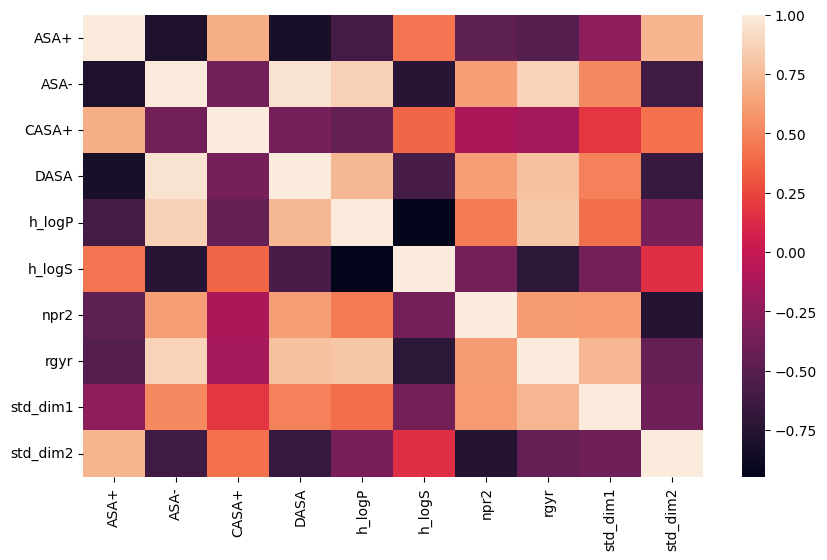

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(best_attr_data.iloc[:,:-1].corr())

## For Class -2

<Axes: >

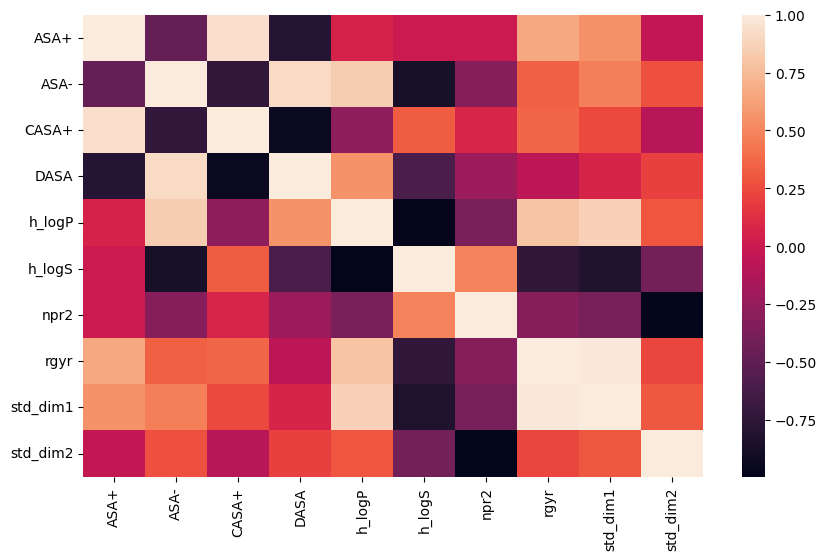

In [132]:
best_cl_2 = best_attr_data[best_attr_data['Class'] == -2]
plt.figure(figsize=(10,6))
sns.heatmap(best_cl_2.iloc[:,:-1].corr())

## For Class -1

<Axes: >

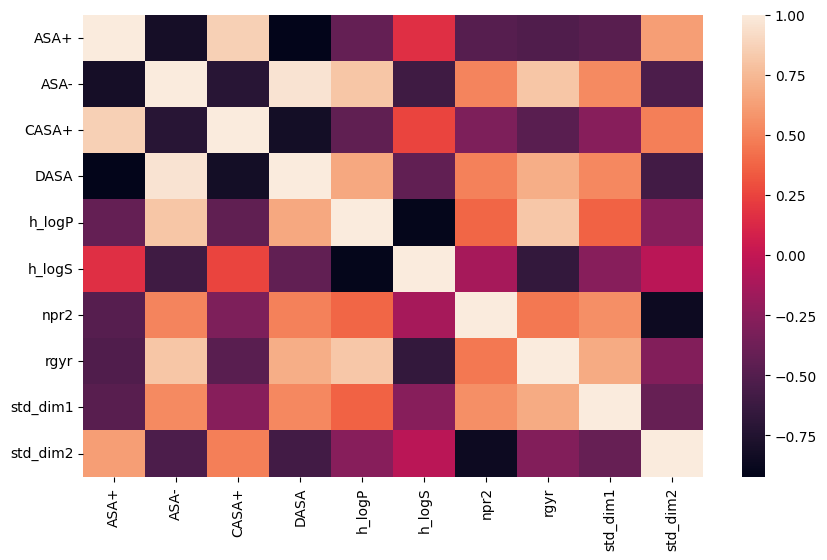

In [133]:
best_cl_1 = best_attr_data[best_attr_data['Class'] == -1]
plt.figure(figsize=(10,6))
sns.heatmap(best_cl_1.iloc[:,:-1].corr())

## For Class 0

<Axes: >

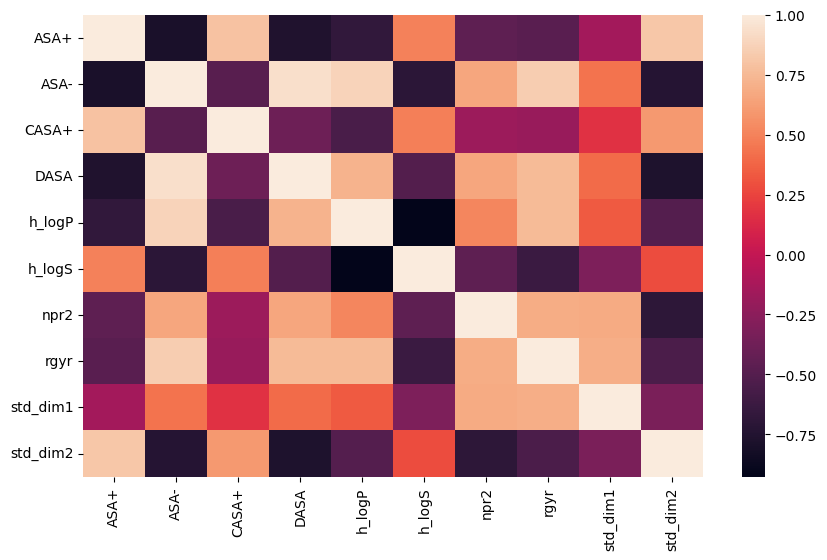

In [134]:
best_cl0 = best_attr_data[best_attr_data['Class'] == 0]
plt.figure(figsize=(10,6))
sns.heatmap(best_cl0.iloc[:,:-1].corr())

## For Class 1

<Axes: >

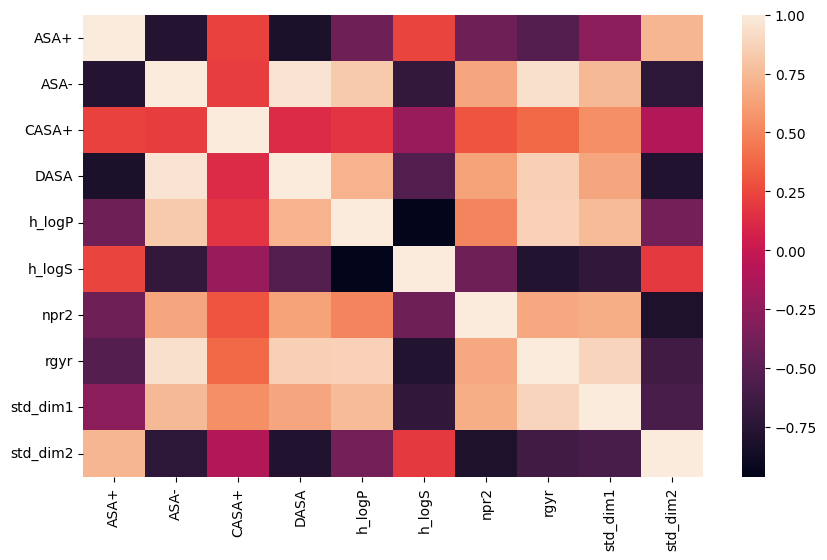

In [135]:
best_cl1 = best_attr_data[best_attr_data['Class'] == 1]
plt.figure(figsize=(10,6))
sns.heatmap(best_cl1.iloc[:,:-1].corr())

## For Class 2

<Axes: >

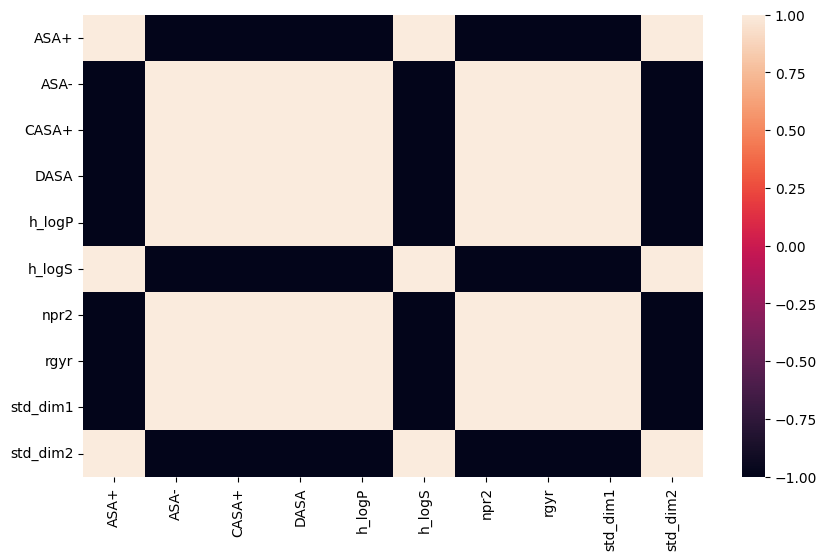

In [136]:
best_cl2 = best_attr_data[best_attr_data['Class'] == 2]
plt.figure(figsize=(10,6))
sns.heatmap(best_cl2.iloc[:,:-1].corr())

In [113]:
import plotly.express as px

fig = px.violin(best_attr_data, y="ASA+", x="Class", color="Class", box=True, points="all",
          hover_data=best_attr_data.columns)
fig.show()

In [114]:
import plotly.express as px

fig = px.violin(best_attr_data, y="ASA-", x="Class", color="Class", box=True, points="all",
          hover_data=best_attr_data.columns)
fig.show()

In [115]:
import plotly.express as px

fig = px.violin(best_attr_data, y="CASA+", x="Class", color="Class", box=True, points="all",
          hover_data=best_attr_data.columns)
fig.show()

In [116]:
import plotly.express as px

fig = px.violin(best_attr_data, y="DASA", x="Class", color="Class", box=True, points="all",
          hover_data=best_attr_data.columns)
fig.show()

In [117]:
import plotly.express as px

fig = px.violin(best_attr_data, y="h_logS", x="Class", color="Class", box=True, points="all",
          hover_data=best_attr_data.columns)
fig.show()

In [118]:
import plotly.express as px

fig = px.violin(best_attr_data, y="h_logP", x="Class", color="Class", box=True, points="all",
          hover_data=best_attr_data.columns)
fig.show()

In [119]:
import plotly.express as px

fig = px.violin(best_attr_data, y="npr2", x="Class", color="Class", box=True, points="all",
          hover_data=best_attr_data.columns)
fig.show()

In [120]:
import plotly.express as px

fig = px.violin(best_attr_data, y="rgyr", x="Class", color="Class", box=True, points="all",
          hover_data=best_attr_data.columns)
fig.show()

In [121]:
import plotly.express as px

fig = px.violin(best_attr_data, y="std_dim1", x="Class", color="Class", box=True, points="all",
          hover_data=best_attr_data.columns)
fig.show()

In [122]:
import plotly.express as px

fig = px.violin(best_attr_data, y="std_dim2", x="Class", color="Class", box=True, points="all",
          hover_data=best_attr_data.columns)
fig.show()